In [ ]:
import pandas as pd

# Faylı oxuyaq
df = pd.read_csv("satislar_data.csv")

# Endirim dərəcələrinə görə satılan məhsul miqdarını hesablayaq
discount_impact = df.groupby('discount_pct')['quantity'].sum()

discount_impact


In [5]:
# Həftənin günlərinə görə satışlar
weekday_sales = df.groupby('weekday')['total_amount'].sum()

# Saatlara görə satışlar
hourly_sales = df.groupby('hour')['total_amount'].sum()


In [ ]:
weekday_sales

In [ ]:
hourly_sales

In [8]:
# Kateqoriyalara görə satış miqdarı və məbləği
category_quantity = df.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
category_revenue = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)


In [ ]:
category_quantity

category_revenue

In [12]:
# VIP və adi müştərilərin müqayisəsi
vip_analysis = df.groupby('is_vip_customer').agg({
    'total_amount': ['sum', 'mean'],
    'sale_id': 'count',
    'customer_id': 'nunique'
})


vip_analysis

total_amount             sale_id customer_id
                         sum        mean   count     nunique
is_vip_customer                                             
False             5479756.42  610.625855    8974         448
True               568780.71  554.367164    1026          52

In [13]:
# Əgər qaytarma məlumatları varsa
if 'is_returned' in df.columns:
    # Ümumi qaytarma dərəcəsi
    return_rate = df['is_returned'].mean() * 100

    # Qaytarma səbəbləri
    return_reasons = df[df['is_returned'] == True]['return_reason'].value_counts()

    # Ən çox qaytarılan məhsullar
    product_return_rates = df.groupby('product_name')['is_returned'].mean().sort_values(ascending=False) * 100



In [27]:
return_rate

3

In [28]:
return_reasons

,count
return_reason,
Yanlış məhsul göndərildi,79
Digər səbəb,62
Ölçü uyğun deyil,56
Müştəri fikir dəyişdi,53
Keyfiyyət problemi,50


In [29]:
product_return_rates

,is_returned
product_name,
Geyim məhsulu 30,10.958904
Oyuncaqlar məhsulu 104,9.375000
İdman məhsulu 80,8.235294
Mətbəx məhsulu 45,7.692308
Geyim məhsulu 23,7.692308
...,...
Qida məhsulu 125,0.000000
Qida məhsulu 133,0.000000
İdman məhsulu 81,0.000000


In [ ]:
import pandas as pd
import numpy as np

# Kateqoriya və endirim dərəcəsinə görə satış analizi
cat_discount_analysis = df.pivot_table(
    index='product_category',
    columns='discount_pct',
    values='quantity',
    aggfunc='sum',
    fill_value=0
)


cat_discount_analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# Qrafiklərin daha gözəl görünməsi üçün

sns.set(font_scale=1.2)

# Faylı oxuyaq
df = pd.read_csv("satislar_data.csv")

# Tarix sütununu düzgün formata çevirək
df['date'] = pd.to_datetime(df['date'])


df['date']

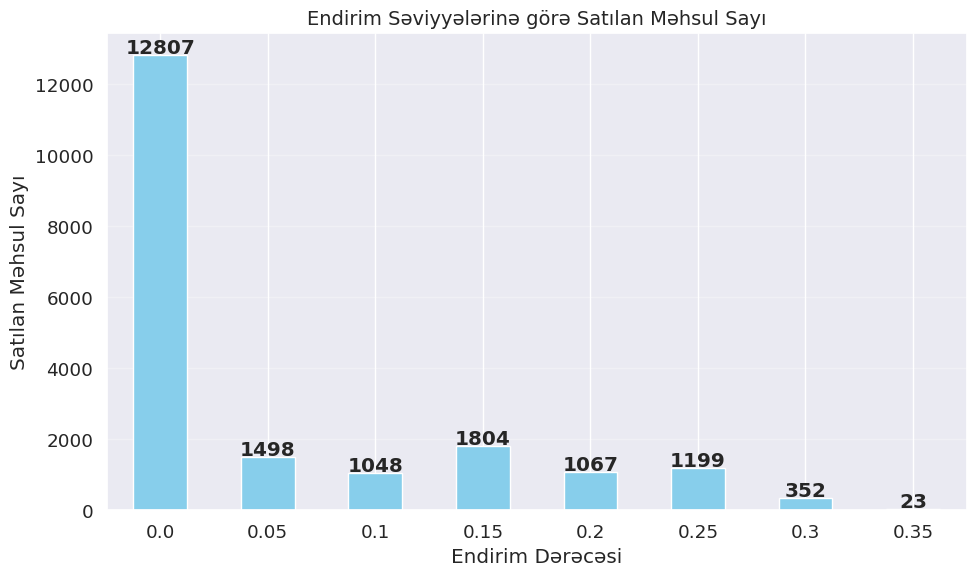

In [36]:
# Endirim səviyyələrinə görə satılan məhsul sayı
discount_impact = df.groupby('discount_pct')['quantity'].sum()

plt.figure(figsize=(10, 6))
discount_impact.plot(kind='bar', color='skyblue')
plt.title('Endirim Səviyyələrinə görə Satılan Məhsul Sayı', fontsize=14)
plt.xlabel('Endirim Dərəcəsi')
plt.ylabel('Satılan Məhsul Sayı')
plt.xticks(rotation=0)  # Oxunması daha rahat olsun deyə etiketləri fırlatmırıq
plt.grid(axis='y', alpha=0.3)

# Hər sütunda dəyərləri göstərək
for i, v in enumerate(discount_impact):
    plt.text(i, v + 50, f"{v}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


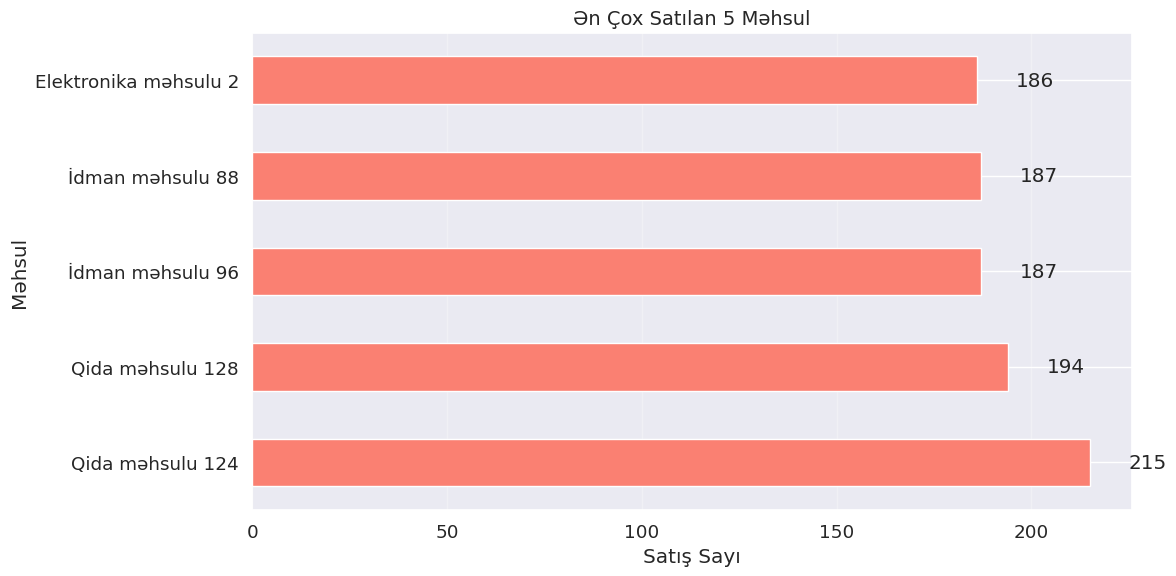

In [37]:
# Ən çox satılan məhsullar
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
ax = top_products.plot(kind='barh', color='salmon')
plt.title('Ən Çox Satılan 5 Məhsul', fontsize=14)
plt.xlabel('Satış Sayı')
plt.ylabel('Məhsul')

# Sütun dəyərlərini göstərək
for i, v in enumerate(top_products):
    plt.text(v + 10, i, f"{v}", va='center')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-38-5d8a550e95ea>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['total_amount'].sum().reset_index()


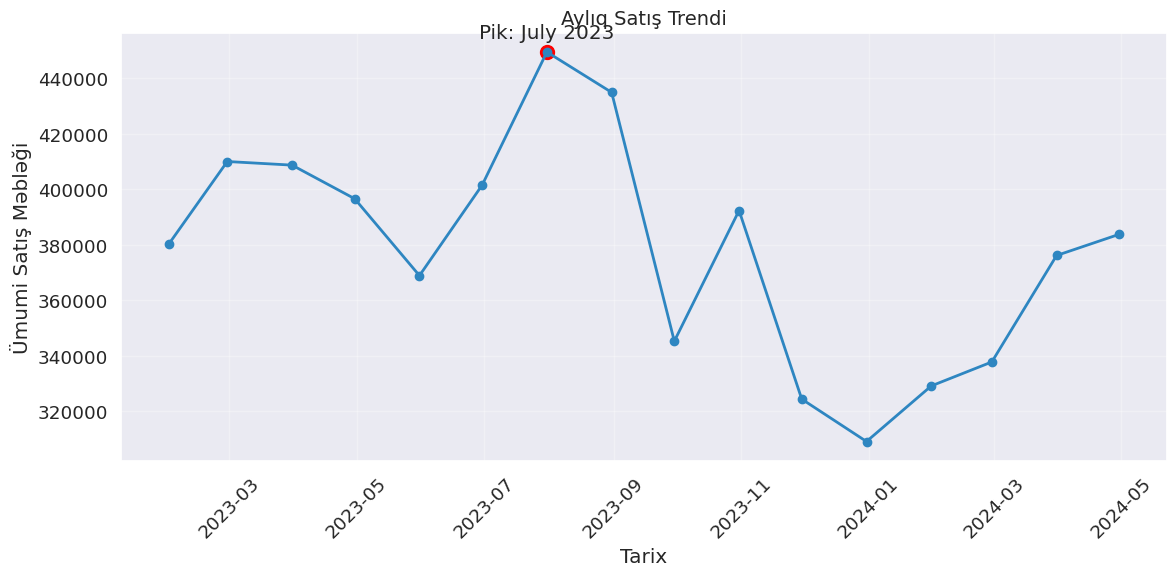

In [38]:
# Aylıq satışları hesablayaq
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['total_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['total_amount'], marker='o', linestyle='-', linewidth=2, color='#2E86C1')
plt.title('Aylıq Satış Trendi', fontsize=14)
plt.xlabel('Tarix')
plt.ylabel('Ümumi Satış Məbləği')
plt.grid(True, alpha=0.3)

# Pik nöqtələri işarələyək
peak_month = monthly_sales.loc[monthly_sales['total_amount'].idxmax()]
plt.scatter(peak_month['date'], peak_month['total_amount'], s=100, color='red')
plt.annotate(f"Pik: {peak_month['date'].strftime('%B %Y')}",
             (peak_month['date'], peak_month['total_amount']),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


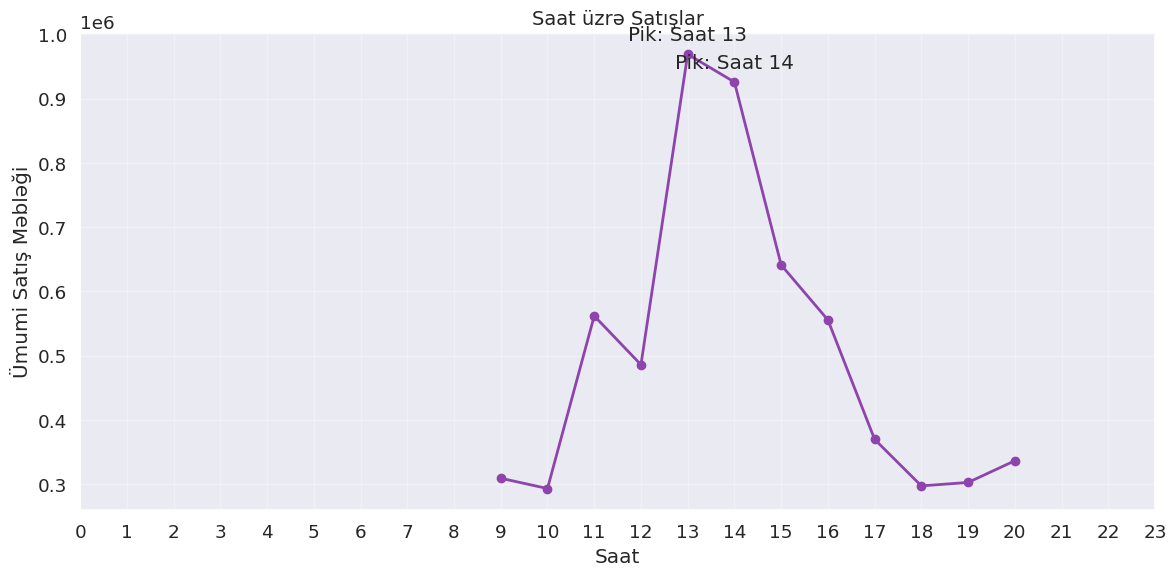

In [39]:
# Saat üzrə satışlar
hourly_sales = df.groupby('hour')['total_amount'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='#8E44AD', linewidth=2)
plt.title('Saat üzrə Satışlar', fontsize=14)
plt.xlabel('Saat')
plt.ylabel('Ümumi Satış Məbləği')
plt.xticks(range(24))  # 24 saat üçün
plt.grid(True, alpha=0.3)

# Pik saatları işarələyək
peak_hours = hourly_sales.nlargest(2)
for hour, amount in peak_hours.items():
    plt.annotate(f"Pik: Saat {hour}",
                 (hour, amount),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


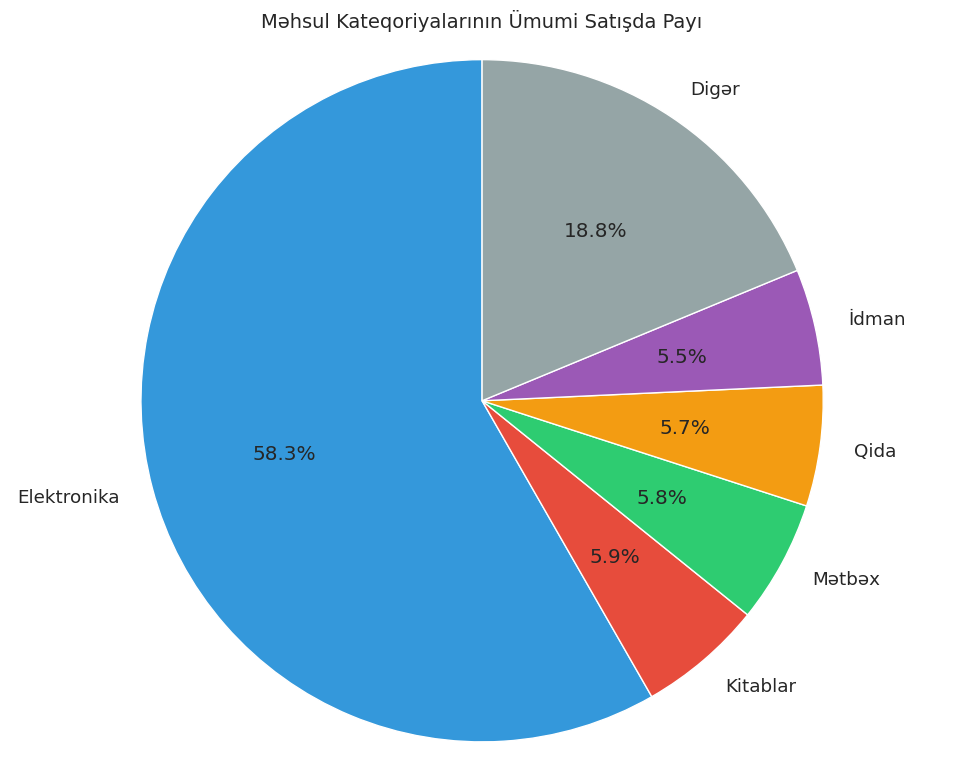

In [40]:
# Kateqoriyalara görə satış məbləği
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
top_categories = category_sales.head(5)
other_categories = pd.Series({'Digər': category_sales[5:].sum()})
pie_data = pd.concat([top_categories, other_categories])

plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
        startangle=90, shadow=False,
        colors=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#95A5A6'])

# Başlıq əlavə edək və dairə şəklində olmasını təmin edək
plt.title('Məhsul Kateqoriyalarının Ümumi Satışda Payı', fontsize=14)
plt.axis('equal')  # Dairə şəklində olması üçün
plt.tight_layout()
plt.show()


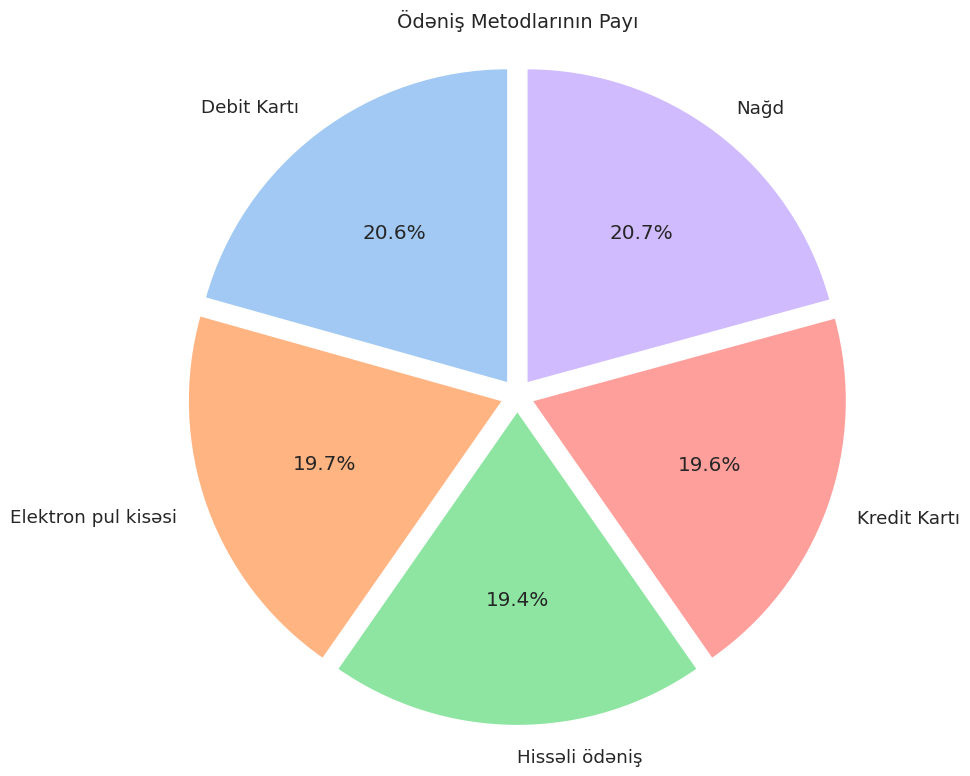

In [41]:
# Ödəniş metodlarına görə satışlar
payment_methods = df.groupby('payment_method')['total_amount'].sum()

plt.figure(figsize=(10, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%',
        startangle=90, explode=[0.05]*len(payment_methods),
        colors=sns.color_palette('pastel'))
plt.title('Ödəniş Metodlarının Payı', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


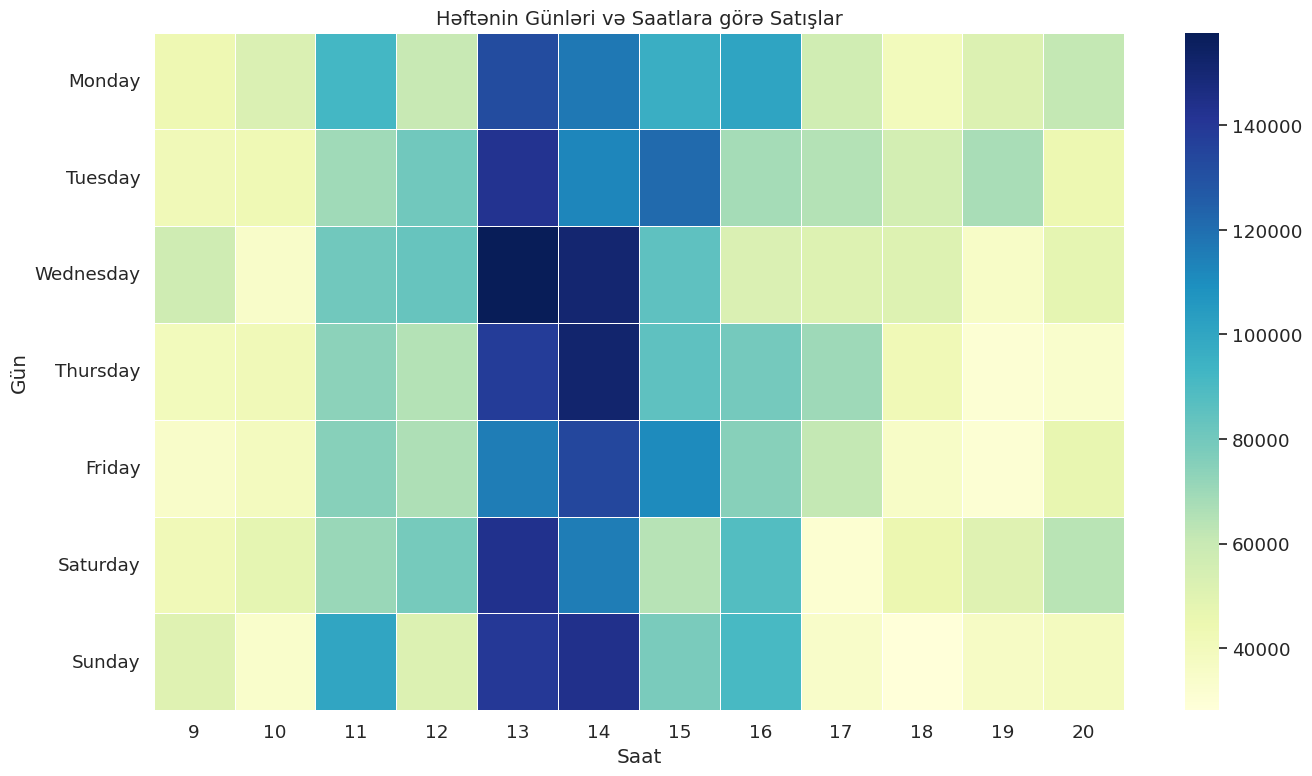

In [42]:
# Həftənin günü və saata görə satışlar
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day_sales = df.pivot_table(index='weekday', columns='hour',
                                values='total_amount', aggfunc='sum')
hour_day_sales = hour_day_sales.reindex(weekday_order)  # Günləri düzgün sıralayaq

plt.figure(figsize=(14, 8))
sns.heatmap(hour_day_sales, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Həftənin Günləri və Saatlara görə Satışlar', fontsize=14)
plt.xlabel('Saat')
plt.ylabel('Gün')

# Pik vaxtları işarələyək
plt.tight_layout()
plt.show()


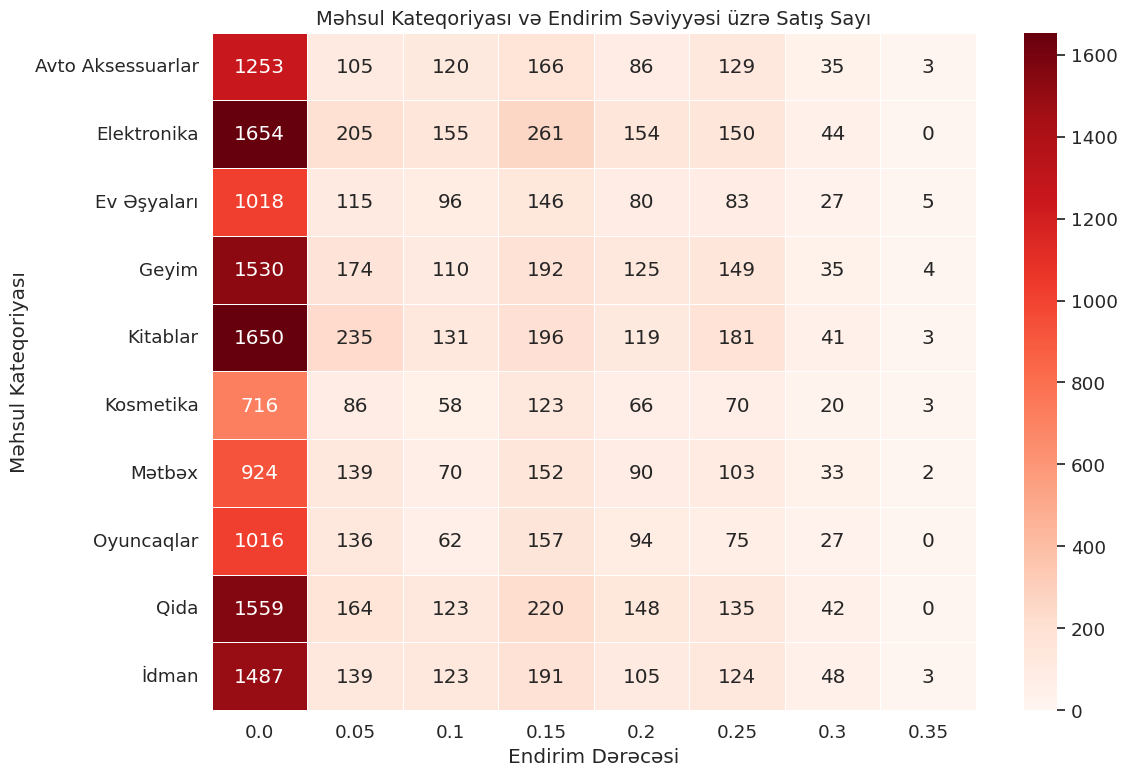

In [43]:
# Kateqoriya və endirim səviyyəsi üzrə satışlar
cat_discount_sales = df.pivot_table(index='product_category', columns='discount_pct',
                                    values='quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(cat_discount_sales, cmap='Reds', annot=True, fmt='g', linewidths=.5)
plt.title('Məhsul Kateqoriyası və Endirim Səviyyəsi üzrə Satış Sayı', fontsize=14)
plt.xlabel('Endirim Dərəcəsi')
plt.ylabel('Məhsul Kateqoriyası')
plt.tight_layout()
plt.show()


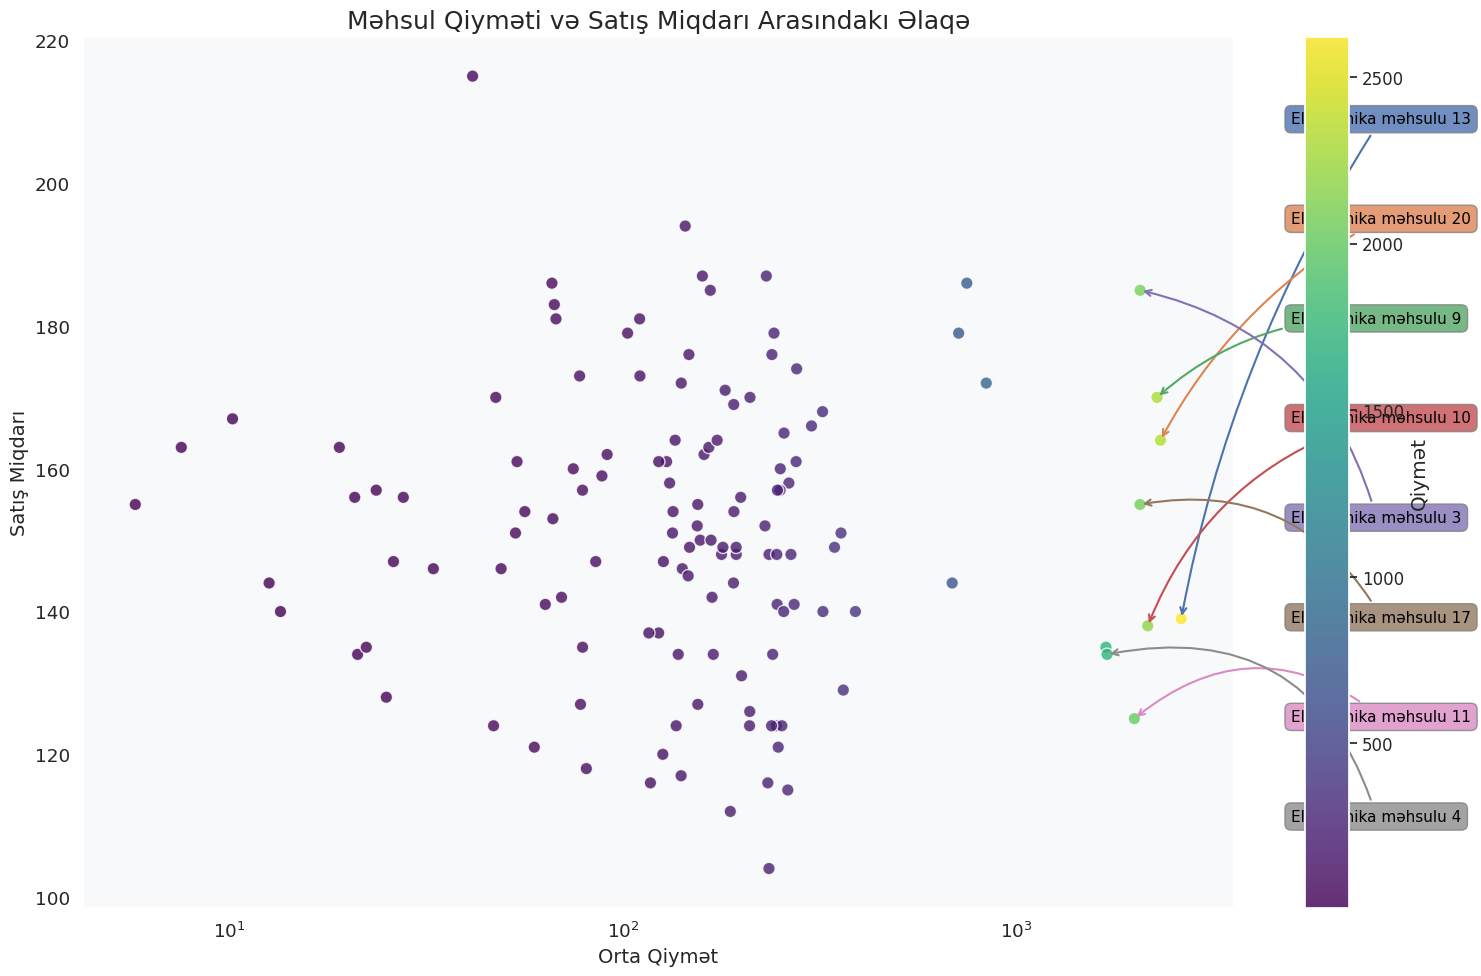

In [55]:
# Hər məhsul üçün orta qiymət və satış miqdarı
product_price_qty = df.groupby('product_name').agg({
    'final_price': 'mean',
    'quantity': 'sum'
}).reset_index()

# Daha böyük qrafik ölçüsü istifadə edək
plt.figure(figsize=(16, 10))

# Nöqtələri çəkək
scatter = plt.scatter(product_price_qty['final_price'], product_price_qty['quantity'],
                     alpha=0.8, s=80, c=product_price_qty['final_price'],
                     cmap='viridis', edgecolors='white', linewidths=1)

plt.title('Məhsul Qiyməti və Satış Miqdarı Arasındakı Əlaqə', fontsize=18)
plt.xlabel('Orta Qiymət', fontsize=14)
plt.ylabel('Satış Miqdarı', fontsize=14)
cbar = plt.colorbar(scatter, label='Qiymət')
cbar.ax.tick_params(labelsize=12)
plt.grid(True, alpha=0.3)

# Yuxarı-sağ hissədə olan (yüksək qiymət və/ya yüksək miqdar) məhsulları seçək
high_price_threshold = product_price_qty['final_price'].quantile(0.9)
high_qty_threshold = product_price_qty['quantity'].quantile(0.75)

important_products = product_price_qty[
    (product_price_qty['final_price'] > high_price_threshold) |
    ((product_price_qty['quantity'] > high_qty_threshold) &
     (product_price_qty['final_price'] > product_price_qty['final_price'].median()))
].copy()

# Məhsul sayını məhdudlaşdıraq - ən çox 8 məhsul işarələyək
if len(important_products) > 8:
    # İlk öncə qiymətə görə, sonra miqdarına görə sıralayaq
    important_products = important_products.sort_values(
        ['final_price', 'quantity'], ascending=[False, False]
    ).head(8)

# Daha çox yer yaratmaq üçün
plt.subplots_adjust(right=0.65)

# Sabit mövqelərdə aydın etiketlər yaradaq
# Etiketlər sağ tərəfdə bir sütun şəklində düzüləcək
annotation_positions = np.linspace(0.9, 0.1, len(important_products))
colors = plt.cm.Set2(np.linspace(0, 1, len(important_products)))

for i, (idx, row) in enumerate(important_products.iterrows()):
    x, y = row['final_price'], row['quantity']
    name = row['product_name']

    # Hər məhsul üçün fərqli rəng
    color = colors[i]

    # Sağ tərəfdə sabit mövqeli, fərqli rəngli işarələr
    plt.annotate(name,
                xy=(x, y), xycoords='data',
                xytext=(1.05, annotation_positions[i]), textcoords='axes fraction',
                fontsize=11, color='black',
                bbox=dict(boxstyle="round,pad=0.4", fc=f"C{i}", ec="gray", alpha=0.8),
                arrowprops=dict(arrowstyle="->", lw=1.5, color=f"C{i}",
                                connectionstyle=f"arc3,rad={0.1 + i*0.05}"))

# X və Y şkalalarını log miqyasda götürək (böyük qiymət fərqlərini daha yaxşı göstərmək üçün)
plt.xscale('log')

# Əlavə yaxşılaşdırmalar
plt.gca().set_facecolor('#f8f9fa')
plt.grid(which='both', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<ipython-input-45-42ae0d7494d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_category', y='final_price', data=df, palette='Set3')


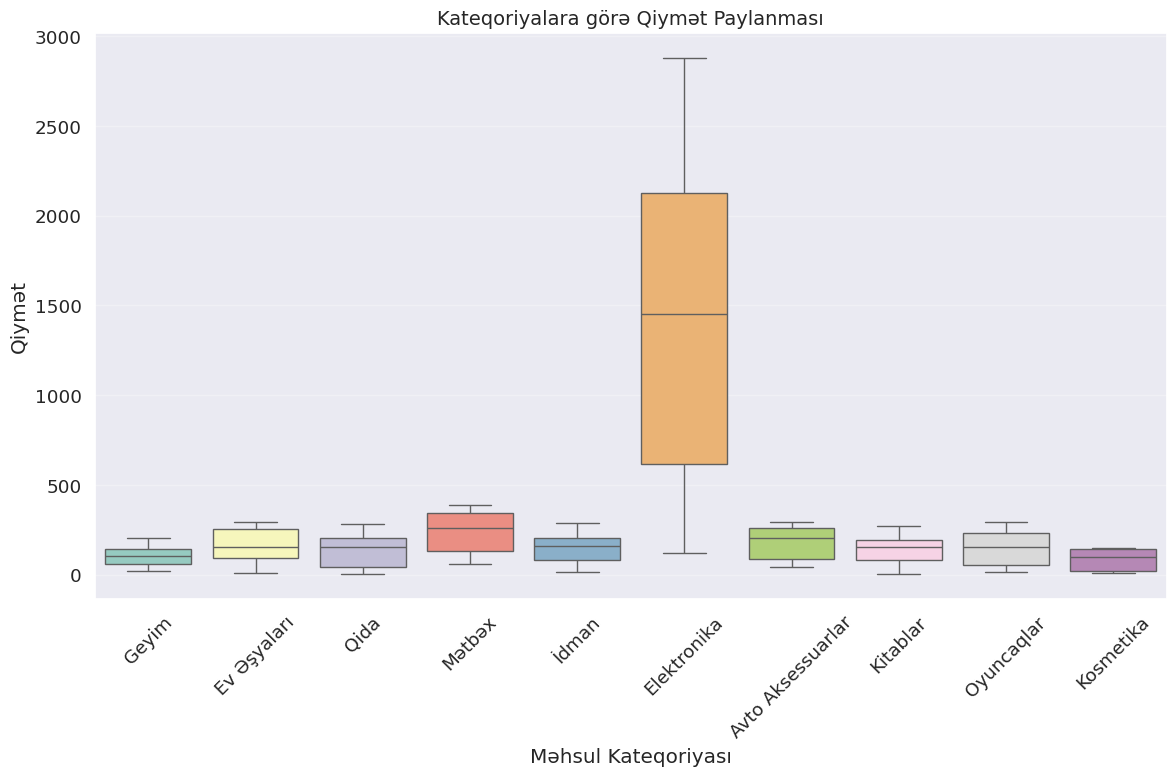

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='product_category', y='final_price', data=df, palette='Set3')
plt.title('Kateqoriyalara görə Qiymət Paylanması', fontsize=14)
plt.xlabel('Məhsul Kateqoriyası')
plt.ylabel('Qiymət')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


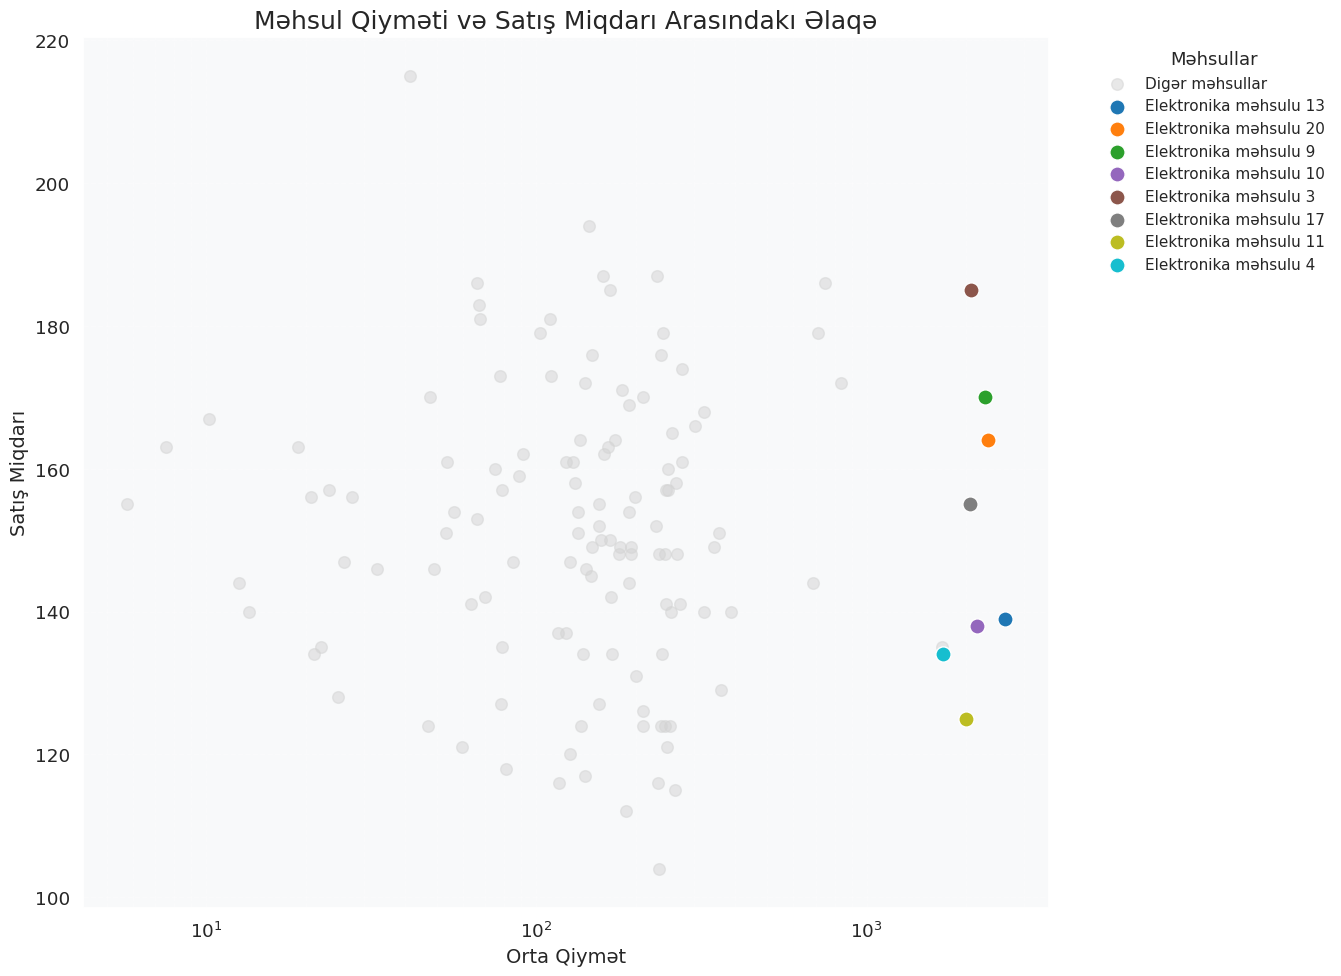

In [56]:
# Hər məhsul üçün orta qiymət və satış miqdarı
product_price_qty = df.groupby('product_name').agg({
    'final_price': 'mean',
    'quantity': 'sum'
}).reset_index()

# Yüksək qiymətli və/ya yüksək miqdarlı məhsulları seçək
high_price_threshold = product_price_qty['final_price'].quantile(0.85)
high_qty_threshold = product_price_qty['quantity'].quantile(0.75)

# Önəmli məhsulları seçək
important_products = product_price_qty[
    (product_price_qty['final_price'] > high_price_threshold) |
    ((product_price_qty['quantity'] > high_qty_threshold) &
     (product_price_qty['final_price'] > product_price_qty['final_price'].median()))
].copy()

# Maksimum 8 məhsulu saxlayaq
if len(important_products) > 8:
    important_products = important_products.sort_values(
        ['final_price', 'quantity'], ascending=[False, False]
    ).head(8)

# Digər məhsulları ayrıca saxlayaq
other_products = product_price_qty[~product_price_qty['product_name'].isin(important_products['product_name'])]

# Qrafik yaradaq
plt.figure(figsize=(14, 10))

# İlk öncə digər məhsulları çəkək (background)
plt.scatter(other_products['final_price'], other_products['quantity'],
           alpha=0.5, s=70, c='lightgray', label='Digər məhsullar')

# Rəng paleti yaradaq
colors = plt.cm.tab10(np.linspace(0, 1, len(important_products)))

# Önəmli məhsulları fərqli rənglərlə çəkək
for i, (idx, row) in enumerate(important_products.iterrows()):
    plt.scatter(row['final_price'], row['quantity'],
               alpha=1.0, s=120, c=[colors[i]],
               edgecolors='white', linewidths=1,
               label=row['product_name'])

plt.title('Məhsul Qiyməti və Satış Miqdarı Arasındakı Əlaqə', fontsize=18)
plt.xlabel('Orta Qiymət', fontsize=14)
plt.ylabel('Satış Miqdarı', fontsize=14)
plt.grid(True, alpha=0.3)

# X oxunu logarifmik miqyasda göstərək
plt.xscale('log')

# Leqendanı sağ tərəfdə və yuxarıda yerləşdirək
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0),
          fontsize=11, title='Məhsullar', title_fontsize=13,
          framealpha=0.8, edgecolor='gray')

# Əlavə yaxşılaşdırmalar
plt.gca().set_facecolor('#f8f9fa')
plt.grid(which='both', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Qrafiklərin daha gözəl görünməsi üçün
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 7)

# Faylı oxuyaq
df = pd.read_csv("satislar_data.csv")

# Tarix sütununu düzgün formata çevirək
df['date'] = pd.to_datetime(df['date'])
if 'return_date' in df.columns:
    df['return_date'] = pd.to_datetime(df['return_date'])

# 1. Endirim Analizi - Bar Qrafiki
discount_impact = df.groupby('discount_pct')['quantity'].sum()

plt.figure()
discount_impact.plot(kind='bar', color='skyblue')
plt.title('Endirim Səviyyələrinə görə Satılan Məhsul Sayı', fontsize=14)
plt.xlabel('Endirim Dərəcəsi')
plt.ylabel('Satılan Məhsul Sayı')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(discount_impact):
    plt.text(i, v + 50, f"{v}", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('discount_bar.png')
plt.close()

# 2. Aylıq Satış Trendi - Xətt Qrafiki
monthly_sales = df.groupby(pd.Grouper(key='date', freq='ME'))['total_amount'].sum().reset_index()

plt.figure()
plt.plot(monthly_sales['date'], monthly_sales['total_amount'], marker='o', linestyle='-', linewidth=2, color='#2E86C1')
plt.title('Aylıq Satış Trendi', fontsize=14)
plt.xlabel('Tarix')
plt.ylabel('Ümumi Satış Məbləği')
plt.grid(True, alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_sales_line.png')
plt.close()

# 3. Məhsul Kateqoriyaları - Dairə Qrafiki
category_sales = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
top_categories = category_sales.head(5)
other_categories = pd.Series({'Digər': category_sales[5:].sum()})
pie_data = pd.concat([top_categories, other_categories])

plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
        startangle=90, shadow=False,
        colors=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#95A5A6'])
plt.title('Məhsul Kateqoriyalarının Ümumi Satışda Payı', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('category_pie.png')
plt.close()

# 4. Həftənin Günü və Saat üzrə Satışlar - İstilik Xəritəsi
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_day_sales = df.pivot_table(index='weekday', columns='hour',
                               values='total_amount', aggfunc='sum')
hour_day_sales = hour_day_sales.reindex(weekday_order)

plt.figure(figsize=(14, 8))
sns.heatmap(hour_day_sales, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Həftənin Günləri və Saatlara görə Satışlar', fontsize=14)
plt.xlabel('Saat')
plt.ylabel('Gün')
plt.tight_layout()
plt.savefig('hour_day_heatmap.png')
plt.close()

# 5. VIP və Regular Müştərilər - Müqayisəli Bar
vip_analysis = df.groupby('is_vip_customer').agg({
    'total_amount': ['mean', 'sum'],
    'sale_id': 'count'
})
vip_analysis.columns = ['Orta Çek', 'Ümumi Gəlir', 'Satış Sayı']
vip_analysis = vip_analysis.rename(index={False: 'Adi Müştəri', True: 'VIP Müştəri'})

plt.figure(figsize=(10, 6))
vip_analysis['Orta Çek'].plot(kind='bar', color=['blue', 'gold'])
plt.title('VIP və Adi Müştərilərin Orta Çeki', fontsize=14)
plt.xlabel('Müştəri Tipi')
plt.ylabel('Orta Çek Məbləği')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(vip_analysis['Orta Çek']):
    plt.text(i, v + 5, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.savefig('vip_regular_bar.png')
plt.close()

# 6. Ödəniş Metodları - Dairə Qrafiki
payment_methods = df.groupby('payment_method')['total_amount'].sum()

plt.figure(figsize=(10, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%',
        startangle=90, explode=[0.05]*len(payment_methods),
        colors=sns.color_palette('pastel'))
plt.title('Ödəniş Metodlarının Payı', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('payment_pie.png')
plt.close()

# 7. Şəhərlərə görə Satışlar - Horizontal Bar Chart
city_sales = df.groupby('customer_city')['total_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
city_sales.plot(kind='barh', color=sns.color_palette('viridis', len(city_sales)))
plt.title('Top 10 Şəhər üzrə Satışlar', fontsize=14)
plt.xlabel('Ümumi Satış Məbləği')
plt.ylabel('Şəhər')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(city_sales):
    plt.text(v + 100, i, f"{v:.0f}", va='center')
plt.tight_layout()
plt.savefig('city_sales_bar.png')
plt.close()

# 8. Kombinə edilmiş vizuallaşdırma - Endirim analizinin daha dərin versiyası
discount_quantity = df.groupby('discount_pct')['quantity'].sum()
discount_revenue = df.groupby('discount_pct')['total_amount'].sum()
discount_avg_check = df.groupby('discount_pct')['total_amount'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Yuxarıdakı qrafik - Satış Həcmi
bars1 = ax1.bar(discount_quantity.index, discount_quantity.values, color='skyblue', alpha=0.7)
ax1.set_ylabel('Satış Miqdarı')
ax1.set_title('Endirim Səviyyələrinin Satış Həcminə Təsiri', fontsize=14)
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# Aşağıdakı qrafik - Orta Çek
bars2 = ax2.bar(discount_avg_check.index, discount_avg_check.values, color='salmon', alpha=0.7)
ax2.set_xlabel('Endirim Dərəcəsi')
ax2.set_ylabel('Orta Çek Məbləği')
ax2.set_title('Endirim Səviyyələrinin Orta Çekə Təsiri', fontsize=14)
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('discount_combined.png')
plt.close()

print("Bütün qrafiklər yaradıldı və saxlanıldı!")


Bütün qrafiklər yaradıldı və saxlanıldı!
